In [ ]:
from tensorflow.keras import optimizers, Input, models, layers, metrics


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical

import sys
import os
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import pandas as pd
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = '/content/drive/MyDrive/sesac_ai/project_2/data/label.csv'

In [ ]:


helmet_data = pd.read_csv(data)
helmet_data.head()

,file_name,label
0,cut_helmet_0.png,With Helmet
1,cut_helmet_1.png,With Helmet
2,cut_helmet_10.png,With Helmet
3,cut_helmet_100.png,Without Helmet
4,cut_helmet_1000.png,Without Helmet


In [ ]:
le = LabelEncoder()
helmet_data['label'] = le.fit_transform(helmet_data['label'])
helmet_data.head()

,file_name,label
0,cut_helmet_0.png,0
1,cut_helmet_1.png,0
2,cut_helmet_10.png,0
3,cut_helmet_100.png,1
4,cut_helmet_1000.png,1


In [ ]:
import cv2

## with helmet without helmet 사진 나누는 코드

In [ ]:
import os
import pandas as pd
import shutil

# csv 파일 경로
csv_path = "/content/drive/MyDrive/sesac_ai/project_2/data/label.csv"

# 이미지 파일이 저장된 디렉토리 경로
image_dir = "/content/drive/MyDrive/sesac_ai/project_2/data/image/cut_image_resize/"

# 각 클래스별로 저장될 디렉토리 경로
with_helmet_dir = "/content/drive/MyDrive/sesac_ai/project_2/data/WithHelmet/"
without_helmet_dir = "/content/drive/MyDrive/sesac_ai/project_2/data/WithoutHelmet/"

# csv 파일을 pandas 데이터프레임으로 읽어옴
df = pd.read_csv(csv_path)

def split_images_by_label():
    for i in range(len(df)):
        row = df.iloc[i]
        # 이미지 파일 경로와 라벨 정보 읽어오기
        img_path = os.path.join(image_dir, row["file_name"])
        label = row["label"]
        
        # 라벨 정보에 따라 이미지 파일 저장
        if label == "Without Helmet":
            dest_dir = without_helmet_dir
        elif label == "With Helmet":
            dest_dir = with_helmet_dir
        else:
            continue
        
        # 디렉토리가 없으면 생성
        if not os.path.exists(dest_dir):
            os.makedirs(dest_dir)
        
        # 이미지 파일 복사
        shutil.copy(img_path, os.path.join(dest_dir, row["file_name"]))

        # 이미지 파일 저장
        save_path = os.path.join(dest_dir, row["file_name"])
        img = cv2.imread(img_path)
        cv2.imwrite(save_path, img)

# 함수 실행
split_images_by_label()

KeyboardInterrupt: ignored

In [ ]:
test_img = plt.imread('/content/drive/MyDrive/sesac_ai/project_2/data/image_label/WithHelmet/cut_helmet_0.png') # imread 함수를 써서 이미지 읽기

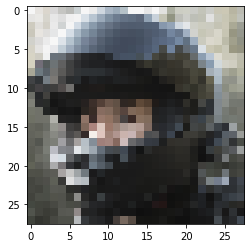

In [ ]:
plt.imshow(test_img) # imshow 함수를 써서 이미지 불러오기
plt.show()

--------------------------

In [ ]:
le = LabelEncoder()
helmet_data['label'] = le.fit_transform(helmet_data['label'])
helmet_data.head()

,file_name,label
0,cut_helmet_0.png,0
1,cut_helmet_1.png,0
2,cut_helmet_10.png,0
3,cut_helmet_100.png,1
4,cut_helmet_1000.png,1


In [ ]:
with_helmet = helmet_data[helmet_data['label'] == 0]
with_helmet = with_helmet.reset_index().drop(columns='index')
with_helmet

,file_name,label
0,cut_helmet_0.png,0
1,cut_helmet_1.png,0
2,cut_helmet_10.png,0
3,cut_helmet_1002.png,0
4,cut_helmet_1003.png,0
...,...,...
1124,cut_helmet_99.png,0
1125,cut_helmet_990.png,0
1126,cut_helmet_991.png,0
1127,cut_helmet_998.png,0


In [ ]:
without_helmet = helmet_data[helmet_data['label'] == 1]
without_helmet = without_helmet.reset_index().drop(columns='index')
without_helmet

,file_name,label
0,cut_helmet_100.png,1
1,cut_helmet_1000.png,1
2,cut_helmet_1001.png,1
3,cut_helmet_101.png,1
4,cut_helmet_1010.png,1
...,...,...
934,cut_helmet_993.png,1
935,cut_helmet_994.png,1
936,cut_helmet_995.png,1
937,cut_helmet_996.png,1


In [ ]:
with_helmet = with_helmet['label']
with_helmet

0       0
1       0
2       0
3       0
4       0
       ..
1124    0
1125    0
1126    0
1127    0
1128    0
Name: label, Length: 1129, dtype: int64

In [ ]:
without_helmet = without_helmet['label']
without_helmet

0      1
1      1
2      1
3      1
4      1
      ..
934    1
935    1
936    1
937    1
938    1
Name: label, Length: 939, dtype: int64

In [ ]:
helmet_img = glob.glob('/content/drive/MyDrive/sesac_ai/project_2/data/image_label/WithHelmet/cut_helmet_*.png')

In [ ]:
helmet_img2 = []

for i in range(len(helmet_img)):
    helmet_img2.append(plt.imread(helmet_img[i]))

In [ ]:
import numpy as np

In [ ]:
train_data = np.array(helmet_img2)

In [ ]:
len(train_data)

1129

In [ ]:
label_data = np.array(with_helmet)

In [ ]:
train_data.shape[0]

1129

In [ ]:
train_data = train_data.reshape(train_data.shape[0],28,28,3) / 255

----

In [ ]:
from sklearn.datasets import load_iris # 샘플 데이터 로딩
from sklearn.model_selection import train_test_split

# load sample
#with_helmet = '/content/drive/MyDrive/sesac_ai/project_2/data/image_label/WithHelmet'
#without_helmet = '/content/drive/MyDrive/sesac_ai/project_2/data/image_label/WithoutHelmet'


# train_test_split
x_train,x_test, y_train,y_test = train_test_split(train_data, label_data, shuffle=True, test_size=0.2, random_state=7)

In [ ]:
x_train

array([[[[0.0031065 , 0.00318339, 0.00330642],
         [0.0031065 , 0.00316801, 0.00330642],
         [0.00313725, 0.00318339, 0.0033218 ],
         ...,
         [0.00312188, 0.00309112, 0.00315263],
         [0.0035371 , 0.00350634, 0.0035371 ],
         [0.00355248, 0.00352172, 0.00349097]],

        [[0.00312188, 0.00316801, 0.00330642],
         [0.00312188, 0.00316801, 0.00330642],
         [0.00313725, 0.00318339, 0.0033218 ],
         ...,
         [0.00312188, 0.0031065 , 0.00318339],
         [0.00335256, 0.00330642, 0.00339869],
         [0.0035371 , 0.00352172, 0.00350634]],

        [[0.00312188, 0.00316801, 0.00327566],
         [0.00313725, 0.00318339, 0.00329104],
         [0.00318339, 0.00318339, 0.00330642],
         ...,
         [0.00355248, 0.00350634, 0.00342945],
         [0.00316801, 0.00307574, 0.00316801],
         [0.00352172, 0.00344483, 0.00342945]],

        ...,

        [[0.00226067, 0.00246059, 0.00309112],
         [0.00219915, 0.00235294, 0.00298347]

In [ ]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

##이미지 증강 코드


In [ ]:
import random
import numpy as np
import os
import cv2
import glob
from PIL import Image
import PIL.ImageOps    

#다음 변수를 수정하여 새로 만들 이미지 갯수를 정합니다.
num_augmented_images = 10000

file_path = '/content/drive/MyDrive/sesac_ai/project_2/data/WithHelmet'
file_names = os.listdir(file_path)
total_origin_image_num = len(file_names)
augment_cnt = 1

for i in range(1, num_augmented_images):
    change_picture_index = random.randrange(1, total_origin_image_num-1)
    print(change_picture_index)
    print(file_names[change_picture_index])
    file_name = file_names[change_picture_index]
    
    origin_image_path = '/content/drive/MyDrive/sesac_ai/project_2/data/WithHelmet/' + file_name
    print(origin_image_path)
    image = Image.open(origin_image_path)
    random_augment = random.randrange(1,4)
    
    if(random_augment == 1):
        #이미지 좌우 반전
        print("invert")
        inverted_image = image.transpose(Image.FLIP_LEFT_RIGHT)
        inverted_image.save('/content/drive/MyDrive/sesac_ai/project_2/data/WithHelmet + 'inverted_' + str(augment_cnt) + '.png')
        
    elif(random_augment == 2):
        #이미지 기울이기
        print("rotate")
        rotated_image = image.rotate(random.randrange(-20, 20))
        rotated_image.save(file_path + 'rotated_' + str(augment_cnt) + '.png')
        
    elif(random_augment == 3):
        #노이즈 추가하기
        img = cv2.imread(origin_image_path)
        print("noise")
        row,col,ch= img.shape
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy_array = img + gauss
        noisy_image = Image.fromarray(np.uint8(noisy_array)).convert('RGB')
        noisy_image.save(file_path + 'noiseAdded_' + str(augment_cnt) + '.png')
        
    augment_cnt += 1

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
14
cut_helmet_1020.png
/content/drive/MyDrive/sesac_ai/project_2/data/WithHelmet/cut_helmet_1020.png
invert
57
cut_helmet_1094.png
/content/drive/MyDrive/sesac_ai/project_2/data/WithHelmet/cut_helmet_1094.png
rotate
48
cut_helmet_1076.png
/content/drive/MyDrive/sesac_ai/project_2/data/WithHelmet/cut_helmet_1076.png
rotate
31
cut_helmet_1046.png
/content/drive/MyDrive/sesac_ai/project_2/data/WithHelmet/cut_helmet_1046.png
invert
42
cut_helmet_1064.png
/content/drive/MyDrive/sesac_ai/project_2/data/WithHelmet/cut_helmet_1064.png
rotate
55
cut_helmet_1092.png
/content/drive/MyDrive/sesac_ai/project_2/data/WithHelmet/cut_helmet_1092.png
noise
86
cut_helmet_1125.png
/content/drive/MyDrive/sesac_ai/project_2/data/WithHelmet/cut_helmet_1125.png
rotate
50
cut_helmet_108.png
/content/drive/MyDrive/sesac_ai/project_2/data/WithHelmet/cut_helmet_108.png
rotate
29
cut_helmet_104.png
/content/drive/MyDrive/sesac_ai/project_2/data/WithHelmet/cut_helmet_104.png
inve

In [ ]:
!pip install six numpy scipy Pillow matplotlib scikit-image opencv-python imageio Shapely
!pip install imgaug

!pip install opencv-python==3.4.0.12 #버전 부분을 비워 놓을 경우 설치 가능한 버전을 보여주어, 다른 버전도 설치 가능하다.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement opencv-python==3.4.0.12 (from versions: 3.4.0.14, 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.14.53, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.2.54, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72)
ERROR: No matching distribution found for opencv-python==3.4.0.12


In [ ]:
import random
import numpy as np
import os
import cv2
import glob
from PIL import Image
import PIL.ImageOps    

#다음 변수를 수정하여 새로 만들 이미지 갯수를 정합니다.
num_augmented_images = 10000

file_path = '/content/drive/MyDrive/sesac_ai/project_2/data/image/cut_image_resize'
file_names = os.listdir(file_path)
total_origin_image_num = len(file_names)
augment_cnt = 1


In [ ]:
file_names[:10]

['cut_helmet_1939.png',
 'cut_helmet_1936.png',
 'cut_helmet_192.png',
 'cut_helmet_1960.png',
 'cut_helmet_1872.png',
 'cut_helmet_1934.png',
 'cut_helmet_1944.png',
 'cut_helmet_1903.png',
 'cut_helmet_199.png',
 'cut_helmet_1991.png']

In [ ]:
total_origin_image_num

2069

In [ ]:
import random
import numpy as np
import os
import cv2
import glob
from PIL import Image
import PIL.ImageOps    

#다음 변수를 수정하여 새로 만들 이미지 갯수를 정합니다.
num_augmented_images = 20000

file_path = '/content/drive/MyDrive/sesac_ai/project_2/data/image/cut_image_resize'
file_names = os.listdir(file_path)
total_origin_image_num = len(file_names)
augment_cnt = 1

for i in range(1, num_augmented_images):
    change_picture_index = random.randrange(1, total_origin_image_num-1)
    print(change_picture_index)
    print(file_names[change_picture_index])
    file_name = file_names[change_picture_index]
    
    origin_image_path = '/content/drive/MyDrive/sesac_ai/project_2/data/image/cut_image_resize/' + file_name
    print(origin_image_path)
    image = Image.open(origin_image_path)
    random_augment = random.randrange(1,4)
    
    if(random_augment == 1):
        #이미지 좌우 반전
        print("invert")
        inverted_image = image.transpose(Image.FLIP_LEFT_RIGHT)
        inverted_image.save(file_path + 'inverted_' + str(augment_cnt) + '.png')
        
    elif(random_augment == 2):
        #이미지 기울이기
        print("rotate")
        rotated_image = image.rotate(random.randrange(-20, 20))
        rotated_image.save(file_path + 'rotated_' + str(augment_cnt) + '.png')
        
    elif(random_augment == 3):
        #노이즈 추가하기
        img = cv2.imread(origin_image_path)
        print("noise")
        row,col,ch= img.shape
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy_array = img + gauss
        noisy_image = Image.fromarray(np.uint8(noisy_array)).convert('RGB')
        noisy_image.save(file_path + 'noiseAdded_' + str(augment_cnt) + '.png')
        
    augment_cnt += 1

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1797
cut_helmet_1822.png
/content/drive/MyDrive/sesac_ai/project_2/data/image/cut_image_resize/cut_helmet_1822.png
invert
354
cut_helmet_462.png
/content/drive/MyDrive/sesac_ai/project_2/data/image/cut_image_resize/cut_helmet_462.png
noise
1708
cut_helmet_174.png
/content/drive/MyDrive/sesac_ai/project_2/data/image/cut_image_resize/cut_helmet_174.png
noise
1311
cut_helmet_1333.png
/content/drive/MyDrive/sesac_ai/project_2/data/image/cut_image_resize/cut_helmet_1333.png
rotate
1398
cut_helmet_1477.png
/content/drive/MyDrive/sesac_ai/project_2/data/image/cut_image_resize/cut_helmet_1477.png
noise
889
cut_helmet_95.png
/content/drive/MyDrive/sesac_ai/project_2/data/image/cut_image_resize/cut_helmet_95.png
invert
1232
cut_helmet_1296.png
/content/drive/MyDrive/sesac_ai/project_2/data/image/cut_image_resize/cut_helmet_1296.png
rotate
879
cut_helmet_86.png
/content/drive/MyDrive/sesac_ai/project_2/data/image/cut_image_resize/cut_helmet_86.png
invert
1995
c

SyntaxError: ignored

In [ ]:
helmet_img = glob.glob('/content/drive/MyDrive/sesac_ai/project_2/data/image/cut_image_resize/cut_helmet_*.png')

In [ ]:
helmet_img2 = []

for i in range(len(helmet_img)):
    helmet_img2.append(plt.imread(helmet_img[i]))

In [ ]:
helmet_img2

In [ ]:
import numpy as np

In [ ]:
train_data = np.array(helmet_img2)

In [ ]:
label_data = np.array(label_data)

In [ ]:
train_data.shape[0]

In [ ]:
train_data = train_data.reshape(train_data.shape[0],28,28,3) / 255

In [ ]:
x_train = train_data[:-500]
x_test = train_data[-500:]

y_train = label_data[:-500]
y_test = label_data[-500:]

In [ ]:
type(label_data)

In [ ]:
# 컨볼루션 신경망 설정

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),input_shape=(28,28,3),activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

In [ ]:
# https://deep-deep-deep.tistory.com/53
# 모델 실행 환경 설정

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 최적화 구역 설정 / 폴더 생성 및 설정
MODEL_DIR = '/content/drive/MyDrive/sesac_ai/project_2/model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath = '/content/drive/MyDrive/sesac_ai/project_2/model/helmet.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose = 1, save_best_only=True) 
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10) # 모델 학습 중에 검증 데이터 손실이 더 이상 개선되지 않을 때 조기 종료하는 역할

In [ ]:
# 모델 실행

history = model.fit(x_train, y_train, validation_split=0.25, epochs=500, batch_size=200)

# 테스트 정확도 출력
print('\n Test Dataset ACC : %.4f'%(model.evaluate(x_test,y_test)[1]))

In [ ]:
# 전이 학습으로 모델 성능 극대화 (transfer learning)
from tensorflow.keras.applications import VGG16

In [ ]:
#모델링
#vgg16 불러오기

transfer_model=VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
transfer_model.trainable=False
transfer_model.summary()

In [ ]:
finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64))
finetune_model.add(Activation('relu'))
finetune_model.add(Dropout(0.5))
finetune_model.add(Dense(1))
finetune_model.add(Activation('sigmoid'))

finetune_model.summary()

In [ ]:
#모델 실행
finetune_model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

history=finetune_model.fit(
    x_train,
    epochs=100,
    validation_data=x_test,
    validation_steps=10,
    callbacks=[early_stopping_callback]
)

In [ ]:
# 학습용 데이터 셋 / 검증 셋 오차 저장

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='o', c='red', label='Test Dataset loss')
plt.plot(x_len, y_loss, marker='o', c='blue', label='Train Dataset loss')

plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()